In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib as mpl
from scipy.stats import shapiro
import scipy.stats as st
mpl.rcParams['pdf.fonttype'] = 42
centimeter = 1/2.54

In [8]:
race_control = pd.read_csv('../../data/user_study/race_control.csv')
race_treatment = pd.read_csv('../../data/user_study/race_treatment.csv')
gender_control = pd.read_csv('../../data/user_study/gender_control.csv')
gender_treatment = pd.read_csv('../../data/user_study/gender_treatment.csv')

In [9]:
fashion_questions = ['If you had to guess, what percentage of the US population associate the terms "fashionable" and "classy" with White people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "fashionable" and "classy" with Black people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "fashionable" and "classy" with Asian people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "fashionable" and "classy" with Latinx people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "beautiful" and "attractive" with White people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "beautiful" and "attractive" with Black people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "beautiful" and "attractive" with Asian people? - Percentage',
       'If you had to guess, what percentage of the US population associate the terms "beautiful" and "attractive" with Latinx people? - Percentage']

posters_questions = ['If you had to guess, what percentage of White employees play a leading role in their organization? - Percentage',
       'If you had to guess, what percentage of Black employees play a leading role in their organization? - Percentage',
       'If you had to guess, what percentage of Asian employees play a leading role in their organization? - Percentage',
       'If you had to guess, what percentage of Latinx employees play a leading role in their organization? - Percentage']

ads_questions = ['If you had to guess, what proportion of White households in the US do you think make more than $500,000 a year? - Percentage',
       'If you had to guess, what proportion of Black households in the US do you think make more than $500,000 a year? - Percentage',
       'If you had to guess, what proportion of Asian households in the US do you think make more than $500,000 a year? - Percentage',
       'If you had to guess, what proportion of Latinx households in the US do you think make more than $500,000 a year? - Percentage']

gender_ads_questions = ['If you had to guess, in the Banking industry in the US, what percentage of employees are men? - Percentage']
gender_poster_questions = ['Q1: To what degree do you agree with this statement: “In popular media, women are more likely to be hired for their looks than their acting skills” - Percentage','Q2: In the US, what proportion of women do you believe are hired at least partially based on their physical appearance? - Percentage']

demographic_questions = ['How would you describe your political ideology',
       'What is your age? - age',
       'Please select your gender identity? - Selected Choice',
       'Please select your gender identity? - Other (specify) - Text',
       'Which of the following best describes your race?',
       'What is the highest level of education you have completed? - Selected Choice',
       'What is the highest level of education you have completed? - Other (specify) - Text',
       '​​Which of the following best describes your total annual income before taxes?']

answers_control_fashion = race_control[fashion_questions]
answers_treatment_fashion = race_treatment[fashion_questions]
answers_control_posters = race_control[posters_questions]
answers_treatment_posters = race_treatment[posters_questions]
answers_control_ads = race_control[ads_questions]
answers_treatment_ads = race_treatment[ads_questions]
answers_gender_control_ads = gender_control[gender_ads_questions]
answers_gender_treatment_ads = gender_treatment[gender_ads_questions]
answers_gender_control_posters = gender_control[gender_poster_questions]
answers_gender_treatment_posters = gender_treatment[gender_poster_questions]


answers_control_fashion_demographic = race_control[fashion_questions + demographic_questions]
answers_treatment_fashion_demographic = race_treatment[fashion_questions + demographic_questions]
answers_control_posters_demographic = race_control[posters_questions + demographic_questions]
answers_treatment_posters_demographic = race_treatment[posters_questions + demographic_questions]
answers_control_ads_demographic = race_control[ads_questions + demographic_questions]
answers_treatment_ads_demographic = race_treatment[ads_questions + demographic_questions]
answers_gender_control_ads_demographic = gender_control[gender_ads_questions + demographic_questions]
answers_gender_treatment_ads_demographic = gender_treatment[gender_ads_questions + demographic_questions]
answers_gender_control_posters_demographic = gender_control[gender_poster_questions + demographic_questions]
answers_gender_treatment_posters_demographic = gender_treatment[gender_poster_questions + demographic_questions]


answers_control_ads = answers_control_ads.dropna() 
answers_control_fashion = answers_control_fashion.dropna() 
answers_control_posters = answers_control_posters.dropna() 
answers_treatment_ads = answers_treatment_ads.dropna() 
answers_treatment_fashion = answers_treatment_fashion.dropna() 
answers_treatment_posters = answers_treatment_posters.dropna() 
answers_gender_control_ads = answers_gender_control_ads.dropna()
answers_gender_treatment_ads = answers_gender_treatment_ads.dropna()
answers_gender_control_posters = answers_gender_control_posters.dropna()
answers_gender_treatment_posters = answers_gender_treatment_posters.dropna()


answers_control_fashion_demographic = answers_control_fashion_demographic.dropna(subset = answers_control_fashion_demographic.columns[0])
answers_treatment_fashion_demographic = answers_treatment_fashion_demographic.dropna(subset = answers_treatment_fashion_demographic.columns[0])
answers_control_posters_demographic = answers_control_posters_demographic.dropna(subset = answers_control_posters_demographic.columns[0])
answers_treatment_posters_demographic = answers_treatment_posters_demographic.dropna(subset = answers_treatment_posters_demographic.columns[0])
answers_control_ads_demographic = answers_control_ads_demographic.dropna(subset = answers_control_ads_demographic.columns[0])
answers_treatment_ads_demographic = answers_treatment_ads_demographic.dropna(subset = answers_treatment_ads_demographic.columns[0])
answers_gender_control_ads_demographic = answers_gender_control_ads_demographic.dropna(subset = answers_gender_control_ads_demographic.columns[0])
answers_gender_treatment_ads_demographic = answers_gender_treatment_ads_demographic.dropna(subset = answers_gender_treatment_ads_demographic.columns[0])
answers_gender_control_posters_demographic = answers_gender_control_posters_demographic.dropna(subset = answers_gender_control_posters_demographic.columns[0])
answers_gender_treatment_posters_demographic = answers_gender_treatment_posters_demographic.dropna(subset = answers_gender_treatment_posters_demographic.columns[0])

answers_control_fashion_demographic = answers_control_fashion_demographic[demographic_questions] 
answers_treatment_fashion_demographic = answers_treatment_fashion_demographic[demographic_questions] 
answers_control_posters_demographic = answers_control_posters_demographic[demographic_questions] 
answers_treatment_posters_demographic = answers_treatment_posters_demographic[demographic_questions] 
answers_control_ads_demographic = answers_control_ads_demographic[demographic_questions] 
answers_treatment_ads_demographic = answers_treatment_ads_demographic[demographic_questions] 
answers_gender_control_ads_demographic = answers_gender_control_ads_demographic[demographic_questions] 
answers_gender_treatment_ads_demographic = answers_gender_treatment_ads_demographic[demographic_questions] 
answers_gender_control_posters_demographic = answers_gender_control_posters_demographic[demographic_questions] 
answers_gender_treatment_posters_demographic = answers_gender_treatment_posters_demographic[demographic_questions] 


answers_gender_treatment_posters_demographic.head()

,How would you describe your political ideology,What is your age? - age,Please select your gender identity? - Selected Choice,Please select your gender identity? - Other (specify) - Text,Which of the following best describes your race?,What is the highest level of education you have completed? - Selected Choice,What is the highest level of education you have completed? - Other (specify) - Text,​​Which of the following best describes your total annual income before taxes?
1,independent,18,Female,NaN,Asian,High School Diploma or Equivalent,NaN,"Less than $25,000"
4,independent,27,Other (specify),NaN,Other,Some College or Associate's Degree,NaN,"$25,000 - $49,999"
5,independent,62,Female,NaN,LatinX,Master's Degree,NaN,"$75,000 - $99,999"
7,not very strong Democrat,19,Female,NaN,Asian,Some College or Associate's Degree,NaN,"$50,000 - $74,999"
9,strong Democrat,45,Female,NaN,Black or African American,Bachelor's Degree,NaN,"$25,000 - $49,999"


In [10]:
type = []
race = []
t_or_c = []
values = []

for column in answers_control_ads.columns:
    for value in answers_control_ads[column]:
        t_or_c.append('Control')
        race.append(column.split(' ')[8])
        type.append('Ads')
        values.append(value)

    for value in answers_treatment_ads[column]:
        t_or_c.append('Treatment')
        race.append(column.split(' ')[8])
        type.append('Ads')
        values.append(value)
        

for column in answers_control_fashion.columns:
    for value in answers_control_fashion[column]:
        t_or_c.append('Control')
        race.append(column.split(' ')[-4])
        # s = 'Fashion_' + column.split(' ')[-6].strip('"')
        s = 'Fashion'
        type.append(s)
        values.append(value)
        
    for value in answers_treatment_fashion[column]:
        t_or_c.append('Treatment')
        race.append(column.split(' ')[-4])
        # s = 'Fashion_' + column.split(' ')[-6].strip('"')
        s = 'Fashion'
        type.append(s)
        values.append(value)
        
    
for column in answers_control_posters.columns:
    for value in answers_control_posters[column]:
        t_or_c.append('Control')
        race.append(column.split(' ')[8])
        type.append('Posters')
        values.append(value)
        
    for value in answers_treatment_posters[column]:
        t_or_c.append('Treatment')
        race.append(column.split(' ')[8])
        type.append('Posters')
        values.append(value)
        



df = pd.DataFrame({'Type': type, 'Race' : race, 'T_or_C': t_or_c, 'Value': values})
df.tail(30)
    

,Type,Race,T_or_C,Value
6706,Posters,Latinx,Treatment,10.0
6707,Posters,Latinx,Treatment,15.0
6708,Posters,Latinx,Treatment,10.0
6709,Posters,Latinx,Treatment,40.0
6710,Posters,Latinx,Treatment,16.0
6711,Posters,Latinx,Treatment,26.0
6712,Posters,Latinx,Treatment,25.0
6713,Posters,Latinx,Treatment,10.0
6714,Posters,Latinx,Treatment,11.0
6715,Posters,Latinx,Treatment,40.0


In [11]:
type = []
t_or_c = []
values = []

for value in answers_gender_control_ads[gender_ads_questions[0]].values:
    t_or_c.append('Control')
    type.append('Ads')
    values.append(value)

for value in answers_gender_treatment_ads[gender_ads_questions[0]].values:
    t_or_c.append('Treatment')
    type.append('Ads')
    values.append(value)
    
    
for value in answers_gender_control_posters[gender_poster_questions[0]].values:
    t_or_c.append('Control')
    type.append('Posters_Likert')
    values.append(int(value.split('(')[1].split(')')[0]))
    
for value in answers_gender_treatment_posters[gender_poster_questions[0]].values:
    t_or_c.append('Treatment')
    type.append('Posters_Likert')
    values.append(int(value.split('(')[1].split(')')[0]))
    



df_gender = pd.DataFrame({'Type': type, 'T_or_C': t_or_c, 'Value': values})
df_gender.tail(30)
    

,Type,T_or_C,Value
772,Posters_Likert,Treatment,3.0
773,Posters_Likert,Treatment,2.0
774,Posters_Likert,Treatment,0.0
775,Posters_Likert,Treatment,1.0
776,Posters_Likert,Treatment,2.0
777,Posters_Likert,Treatment,-1.0
778,Posters_Likert,Treatment,2.0
779,Posters_Likert,Treatment,2.0
780,Posters_Likert,Treatment,2.0
781,Posters_Likert,Treatment,1.0


In [12]:
for area in df.Type.unique():
    for race in df.Race.unique():
        for exp in df.T_or_C.unique():
            print(area, race, exp, 'Mean:', df[(df.Type == area) & (df.Race == race) & (df.T_or_C == exp)].Value.mean())
            print(shapiro(df[(df.Type == area) & (df.Race == race) & (df.T_or_C == exp)].Value.values))
            print(area, race, exp, 'STD:', df[(df.Type == area) & (df.Race == race) & (df.T_or_C == exp)].Value.std()) 
            print()
            
        print(area, race, 'Control - Treatment:', abs(df[(df.Type == area) & (df.Race == race) & (df.T_or_C == 'Control')].Value.mean() - df[(df.Type == area) & (df.Race == race) & (df.T_or_C == 'Treatment')].Value.mean()))

Ads White Control Mean: 19.716346153846153
ShapiroResult(statistic=0.8075418472290039, pvalue=2.6668978457485048e-15)
Ads White Control STD: 20.27114086089641

Ads White Treatment Mean: 23.54066985645933
ShapiroResult(statistic=0.8513329029083252, pvalue=2.327913252789249e-13)
Ads White Treatment STD: 21.4594770513721

Ads White Control - Treatment: 3.824323702613178
Ads Black Control Mean: 9.85576923076923
ShapiroResult(statistic=0.6667088866233826, pvalue=5.1961259801510694e-20)
Ads Black Control STD: 14.192205977808264

Ads Black Treatment Mean: 13.698564593301436
ShapiroResult(statistic=0.7241013050079346, pvalue=2.3419522141586157e-18)
Ads Black Treatment STD: 17.67467897235635

Ads Black Control - Treatment: 3.8427953625322058
Ads Asian Control Mean: 15.504807692307692
ShapiroResult(statistic=0.7997758388519287, pvalue=1.2871728659877898e-15)
Ads Asian Control STD: 16.419323362215145

Ads Asian Treatment Mean: 21.47846889952153
ShapiroResult(statistic=0.8330896496772766, pvalue=3

In [22]:
for area in df_gender.Type.unique():
    for exp in df_gender.T_or_C.unique():
        try:
            print(area, exp, 'Mean:', df_gender[(df_gender.Type == area) & (df_gender.T_or_C == exp)].Value.mean())
            print(shapiro(df_gender[(df_gender.Type == area) & (df_gender.T_or_C == exp)].Value.values))
            print(area, exp, 'STD:', df_gender[(df_gender.Type == area) & (df_gender.T_or_C == exp)].Value.std()) 
            print()
        except:
            pass
        
    try:
        print(area, 'Control - Treatment:', abs(df_gender[(df_gender.Type == area) & (df_gender.T_or_C == 'Control')].Value.mean() - df_gender[(df_gender.Type == area) & (df_gender.T_or_C == 'Treatment')].Value.mean()))
    except:
        pass

Ads Control Mean: 68.76616915422886
ShapiroResult(statistic=0.9922284483909607, pvalue=0.36302369832992554)
Ads Control STD: 14.197536749423957

Ads Treatment Mean: 61.08
ShapiroResult(statistic=0.9643375873565674, pvalue=6.0043035773560405e-05)
Ads Treatment STD: 13.615450874376611

Ads None Mean: 65.88557213930348
ShapiroResult(statistic=0.9706038236618042, pvalue=0.00032220158027485013)
Ads None STD: 14.501787503477628

Ads Control - Treatment: 7.686169154228864
Posters_Likert Control Mean: 1.800995024875622
ShapiroResult(statistic=0.7864276170730591, pvalue=7.545447844688928e-16)
Posters_Likert Control STD: 1.0631081812191665

Posters_Likert Treatment Mean: 1.355
ShapiroResult(statistic=0.8865164518356323, pvalue=3.774377338450208e-11)
Posters_Likert Treatment STD: 1.2557305827614504

Posters_Likert None Mean: 1.4577114427860696
ShapiroResult(statistic=0.8430777192115784, pvalue=1.8399779584069714e-13)
Posters_Likert None STD: 1.170236188262185

Posters_Likert Control - Treatment: 

/var/folders/q2/jh49nbrj73x3lvwvlz9642xm0000gp/T/ipykernel_23867/3566889426.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd[letter].set_xticklabels(order, fontsize = 8, rotation =0)
/var/folders/q2/jh49nbrj73x3lvwvlz9642xm0000gp/T/ipykernel_23867/3566889426.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd[letter].set_xticklabels(order, fontsize = 8, rotation =0)
/var/folders/q2/jh49nbrj73x3lvwvlz9642xm0000gp/T/ipykernel_23867/3566889426.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd[letter].set_xticklabels(order, fontsize = 8, rotation =0)
/var/folders/q2/jh49nbrj73x3lvwvlz9642xm0000gp/T/ipykernel_23867/3566889426.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sliced, x = 'T_or_C', y = 'Value', ax = axd[lette

D
Ads
E
Posters_Likert


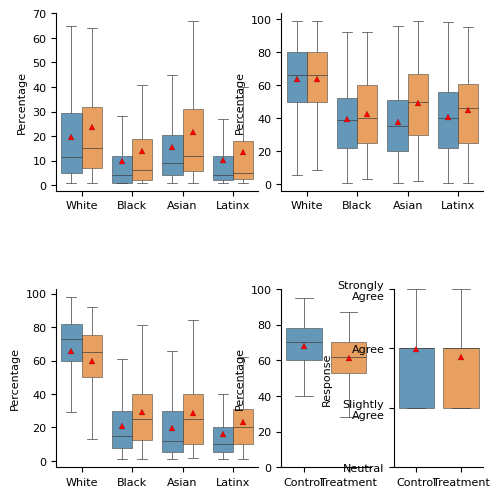

In [20]:
centimeter = 1/2.54
axd = plt.figure(figsize = (14*centimeter, 15*centimeter)).subplot_mosaic(
    """
    AAAABBBB
    CCCCDDEE
    """
)

for letter, t in zip(['A', 'B', 'C'], df.Type.unique()):
    sliced = df[(df['Type'] == t) & (df['Value'] < 100) & (df['Value'] > 0)]
    order = ['White', 'Black', 'Asian', 'Latinx']
    palette = {'Control' : 'tab:blue', 'Treatment' : 'tab:orange', 'None' : 'tab:green'}
    # palette = {'Control' : 'White', 'Treatment' : 'White', 'None' : 'White'}
    sns.boxplot(data=sliced, x = 'Race', y = 'Value', hue = 'T_or_C', ax = axd[letter],\
        showfliers = False, showmeans = True, hue_order = ['Control', 'Treatment'], linewidth=0.5,\
        meanprops = {'marker':'^', 'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize' : 5, 'markeredgewidth' : '0.1'}, order = order, palette=palette,boxprops=dict(alpha=.75))
    
    box_pairs = [
                 (('White', 'Control'), ('White', 'Treatment')),
                 (('Black', 'Control'), ('Black', 'Treatment')),
                 (('Asian', 'Control'), ('Asian', 'Treatment')),
                 (('Latinx', 'Control'), ('Latinx', 'Treatment')),
                ]
    
    axd[letter].legend_.remove()
    
    axd[letter].set_xticklabels(order, fontsize = 8, rotation =0)

    sns.despine()
    
for letter, t in zip(['D', 'E'], ['Ads', 'Posters_Likert']):
    print(letter)
    print(t)
    sliced = df_gender[(df_gender['Type'] == t) & (df_gender['Value'] < 100) & (df_gender['Value'] > 0)]
    order = ['Control', 'Treatment']
    palette = {'Control' : 'tab:blue', 'Treatment' : 'tab:orange', 'None' : 'tab:green'}
    
    sns.boxplot(data=sliced, x = 'T_or_C', y = 'Value', ax = axd[letter],\
        showfliers = False, showmeans = True,  order = order, linewidth=0.5,\
        meanprops = {'marker':'^', 'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize' : 5, 'markeredgewidth' : '0.1'}, palette = palette,boxprops=dict(alpha=.75))
    
    box_pairs = [('Control', 'Treatment')]
    

    if letter == 'E':
        axd[letter].set_ylim(0, 3)
        axd[letter].set_yticks([0, 1, 2, 3])
        axd[letter].set_yticklabels(['Neutral', 'Slightly\nAgree', 'Agree', 'Strongly\nAgree'])
    else:
        axd[letter].set_ylim(0, 100)
    
    axd[letter].set_xticklabels(order, fontsize = 8, rotation =0)

    sns.despine()


for letter in ['A', 'B', 'C', 'D', 'E']:
    axd[letter].set_xlabel('', fontsize = 8)

for letter in ['A', 'B', 'C', 'D', 'E']:
    axd[letter].tick_params(axis='both', which='major', labelsize=8)
    axd[letter].set_ylabel('Percentage', fontsize = 8)
    
for letter in ['E']:
    axd[letter].tick_params(axis='both', which='major', labelsize=8)
    axd[letter].set_ylabel('Response', fontsize = 8)

plt.subplots_adjust(wspace = 0.7, hspace = 0.55)
# plt.savefig('../figures/user_study_nofacecolor.pdf', bbox_inches = 'tight', dpi = 300)

In [16]:


for type in df_gender.Type.unique():
    print(type, 'control', df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Control')]['Value'].mean())
    print(type, 'treatment', df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Treatment')]['Value'].mean())
    print(type, 'diff', df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Treatment')]['Value'].mean() - df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Control')]['Value'].mean())
    print(type, 'control', 'treatment', st.mannwhitneyu(df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Control')]['Value'],\
        df_gender[((df_gender.Type) == type) & (df_gender.T_or_C == 'Treatment')]['Value']))
    
    
for type in df.Type.unique():
    for race in df.Race.unique():
        print(type, race, 'control', df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Control')]['Value'].mean())
        print(type, race, 'treatment', df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Treatment')]['Value'].mean())
        print(type, race, 'diff', df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Treatment')]['Value'].mean() -  df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Control')]['Value'].mean())
        print(type, race, 'control', 'treatment', st.mannwhitneyu(df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Control')]['Value'],\
            df[((df.Type) == type) & (df.Race == race) & (df.T_or_C == 'Treatment')]['Value']))

Ads control 68.76616915422886
Ads treatment 61.08
Ads diff -7.686169154228864
Ads control treatment MannwhitneyuResult(statistic=25666.0, pvalue=1.5736365781963767e-06)
Posters_Likert control 1.800995024875622
Posters_Likert treatment 1.355
Posters_Likert diff -0.4459950248756219
Posters_Likert control treatment MannwhitneyuResult(statistic=24318.5, pvalue=0.0001312472456912153)
Ads White control 19.716346153846153
Ads White treatment 23.54066985645933
Ads White diff 3.824323702613178
Ads White control treatment MannwhitneyuResult(statistic=18963.5, pvalue=0.024107145257327642)
Ads Black control 9.85576923076923
Ads Black treatment 13.698564593301436
Ads Black diff 3.8427953625322058
Ads Black control treatment MannwhitneyuResult(statistic=17942.5, pvalue=0.0019122742091991446)
Ads Asian control 15.504807692307692
Ads Asian treatment 21.47846889952153
Ads Asian diff 5.973661207213839
Ads Asian control treatment MannwhitneyuResult(statistic=17875.0, pvalue=0.0016846005392823608)
Ads Lat